<a href="https://colab.research.google.com/github/JosephJesus24/GrupoSe-ales/blob/main/TrabajoLaboratorio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lectura y graficación de las señales ECG obtenidas con el BITalino LAB4

Se obtuvieron señales ECG de dos pacientes de tres diferentes estados del usuario\
-En estado basal\
-Aguantando la respiración 10 segundos\
-Post-Ejercicio

In [4]:
# Lectura y graficación de una señal almacenada en un archivo txt


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re


# Usuario 1 - Diego Celis

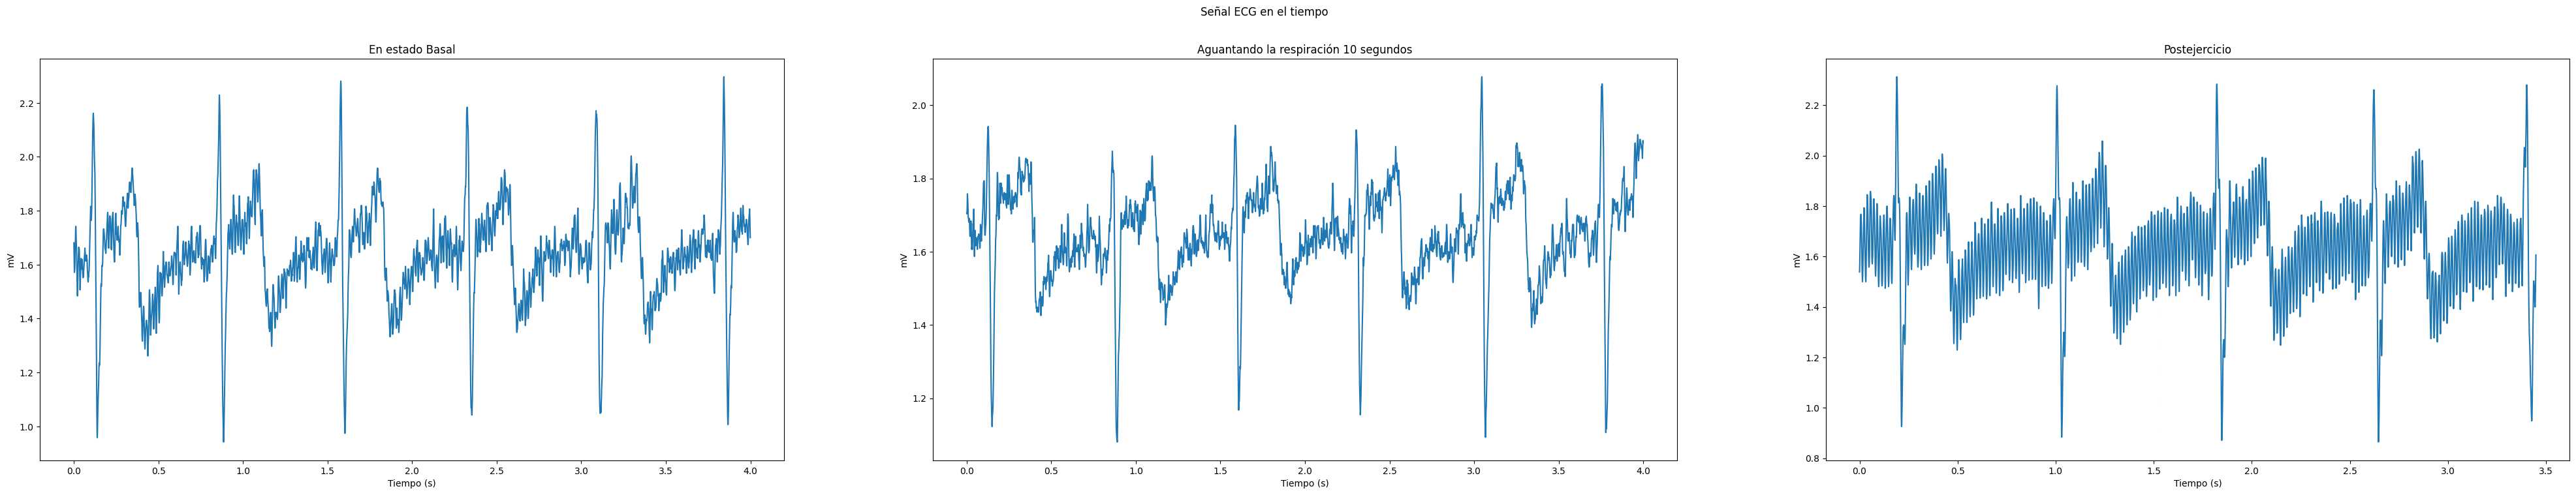

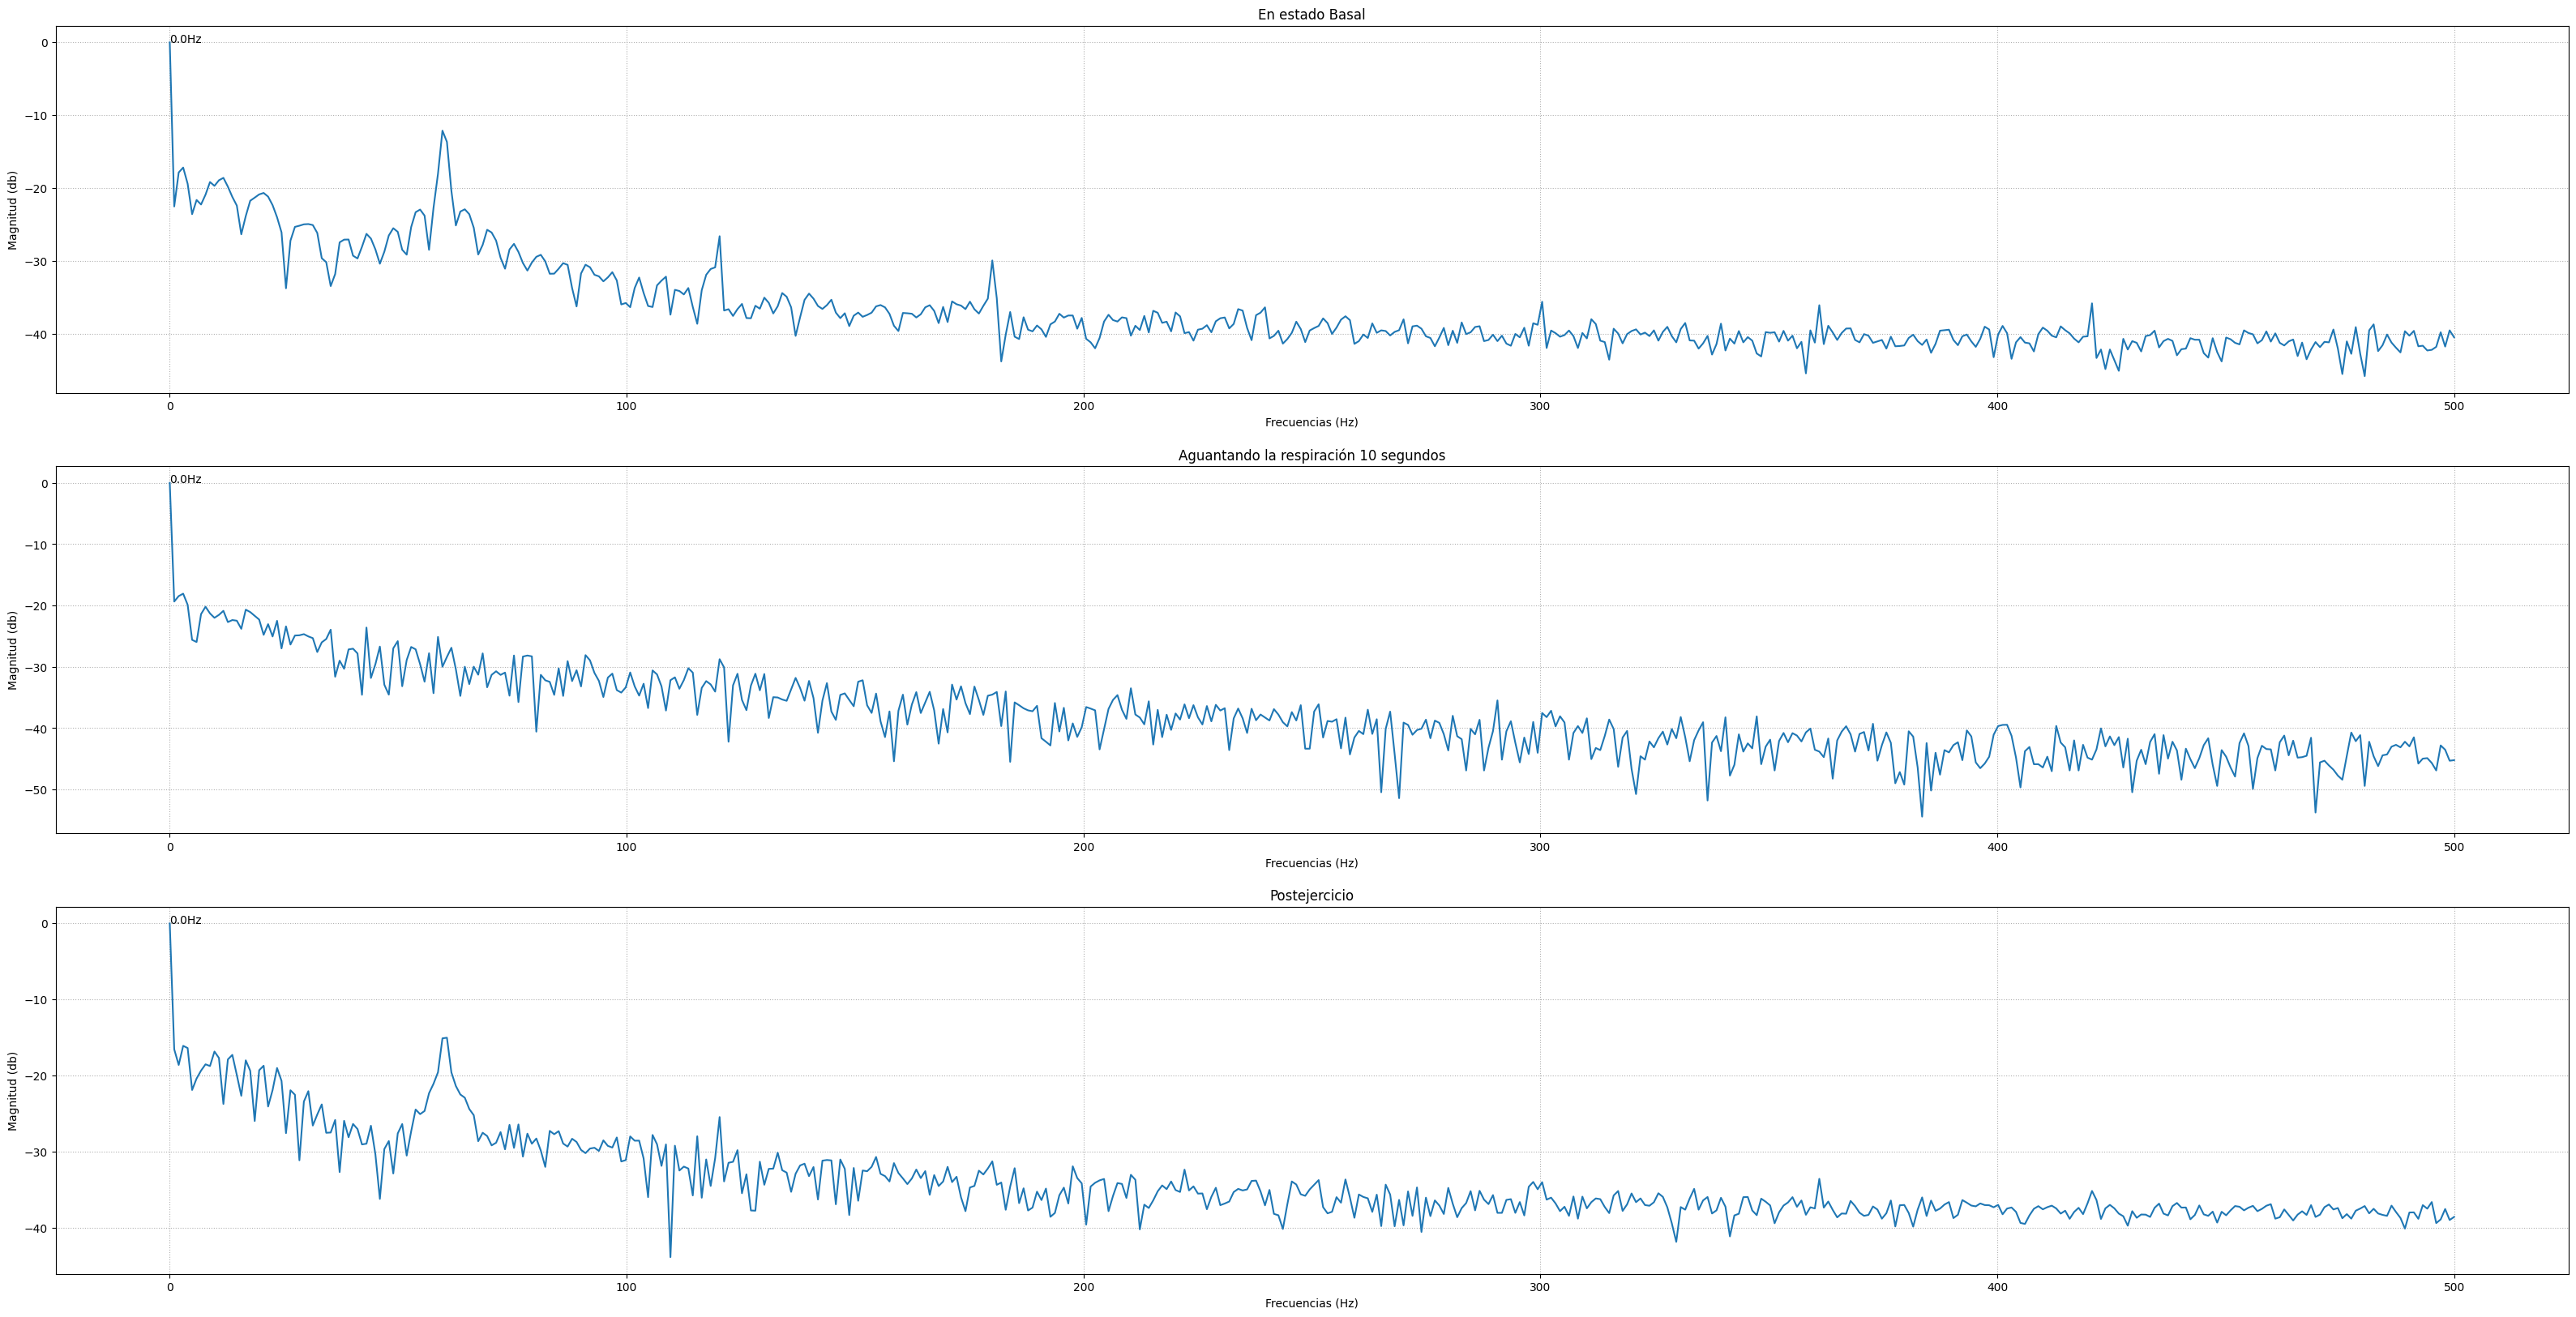

In [5]:

## Leemos el archivo excluyendo las 2 primeras filas del archivo"""
#Paciente Diego Celis
array = np.genfromtxt("./Senal1.txt", delimiter="\t",skip_header = 3) # La "Senal1" es la señal del paciente Celis en estado basal
array1 = np.genfromtxt("./Senal2.txt", delimiter="\t",skip_header = 3)# La "Senal2" es la señal del paciente Celis aguantando la respiracion 10 segundos
array2 = np.genfromtxt("./Senal3.txt", delimiter="\t",skip_header = 3)# La "Senal3" es la señal del paciente Celis post ejercicio
#array

data_mV_ECG_reposo = (array[:,-2])*(3.3/1023) #resolucion*Vref/1023 segun el puerto A2 para ECG
data_mV_ECG_respiracion = (array1[:,-2])*(3.3/1023) #resolucion*Vref/1023 segun el puerto A2 para ECG
data_mV_ECG_deporte = (array2[:,-2])*(3.3/1023) #resolucion*Vref/1023 segun el puerto A2 para ECG

## Ploteo de la lectura"""

plt.figure(figsize=(50,8))
plt.suptitle("Señal ECG en el tiempo");

t1=np.arange(0,len(data_mV_ECG_reposo[30000:34000]))/1000
plt.subplot(1,3,1);plt.plot(t1,data_mV_ECG_reposo[30000:34000]),plt.ylabel("mV"),plt.xlabel("Tiempo (s)"),plt.title("En estado Basal")
t2=np.arange(0,len(data_mV_ECG_respiracion[30000:34000]))/1000
plt.subplot(1,3,2);plt.plot(t2,data_mV_ECG_respiracion[30000:34000]),plt.ylabel("mV"),plt.xlabel("Tiempo (s)"),plt.title("Aguantando la respiración 10 segundos")
t3=np.arange(0,len(data_mV_ECG_deporte[30000:34000]))/1000
plt.subplot(1,3,3);plt.plot(t3,data_mV_ECG_deporte[30000:34000]),plt.ylabel("mV"),plt.xlabel("Tiempo (s)"),plt.title("Postejercicio")



## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia"""

N = 2**10                                     # 10 bits, 0-1023
Fs=1000
F_list = np.linspace(0,Fs/2, N//2)
signal1 = data_mV_ECG_reposo; signal2 = data_mV_ECG_respiracion; signal3 = data_mV_ECG_deporte

signal_fft1 = np.round(np.abs(np.fft.fft(signal1, N)),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux1 = signal_fft1/signal_fft1.max()     # hallamos el maximo para pasar la magnitud a escala db
with np.errstate(divide='ignore'):
    signal_fft_db1 = 10*np.log10(signal_aux1)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero
F1 = np.round(F_list[np.argmax(signal_fft_db1)], 1)   # argmax, encuentra el argumento max en un array

signal_fft2 = np.round(np.abs(np.fft.fft(signal2, N)),3)[0:N//2]
signal_aux2 = signal_fft2/signal_fft2.max()   
with np.errstate(divide='ignore'):
    signal_fft_db2 = 10*np.log10(signal_aux2) 
F2 = np.round(F_list[np.argmax(signal_fft_db2)], 1)  

signal_fft3 = np.round(np.abs(np.fft.fft(signal3, N)),3)[0:N//2] 
signal_aux3 = signal_fft3/signal_fft3.max()    
with np.errstate(divide='ignore'):
    signal_fft_db3 = 10*np.log10(signal_aux3)  
F3 = np.round(F_list[np.argmax(signal_fft_db3)], 1) 

plt.figure(figsize=(40,20))
plt.subplot(3,1,1);plt.plot(F_list, signal_fft_db1);plt.text(F1,0, f"{F1}Hz");plt.grid(linestyle=":");plt.ylabel("Magnitud (db)");plt.xlabel("Frecuencias (Hz)");plt.title("En estado Basal")
plt.subplot(3,1,2);plt.plot(F_list, signal_fft_db2);plt.text(F2,0, f"{F2}Hz");plt.grid(linestyle=":");plt.ylabel("Magnitud (db)");plt.xlabel("Frecuencias (Hz)");plt.title("Aguantando la respiración 10 segundos")
plt.subplot(3,1,3);plt.plot(F_list, signal_fft_db3);plt.text(F3,0, f"{F3}Hz");plt.grid(linestyle=":");plt.ylabel("Magnitud (db)");plt.xlabel("Frecuencias (Hz)");plt.title("Postejercicio")

plt.show()

# Usuario 2 - Ricardo Muñoz

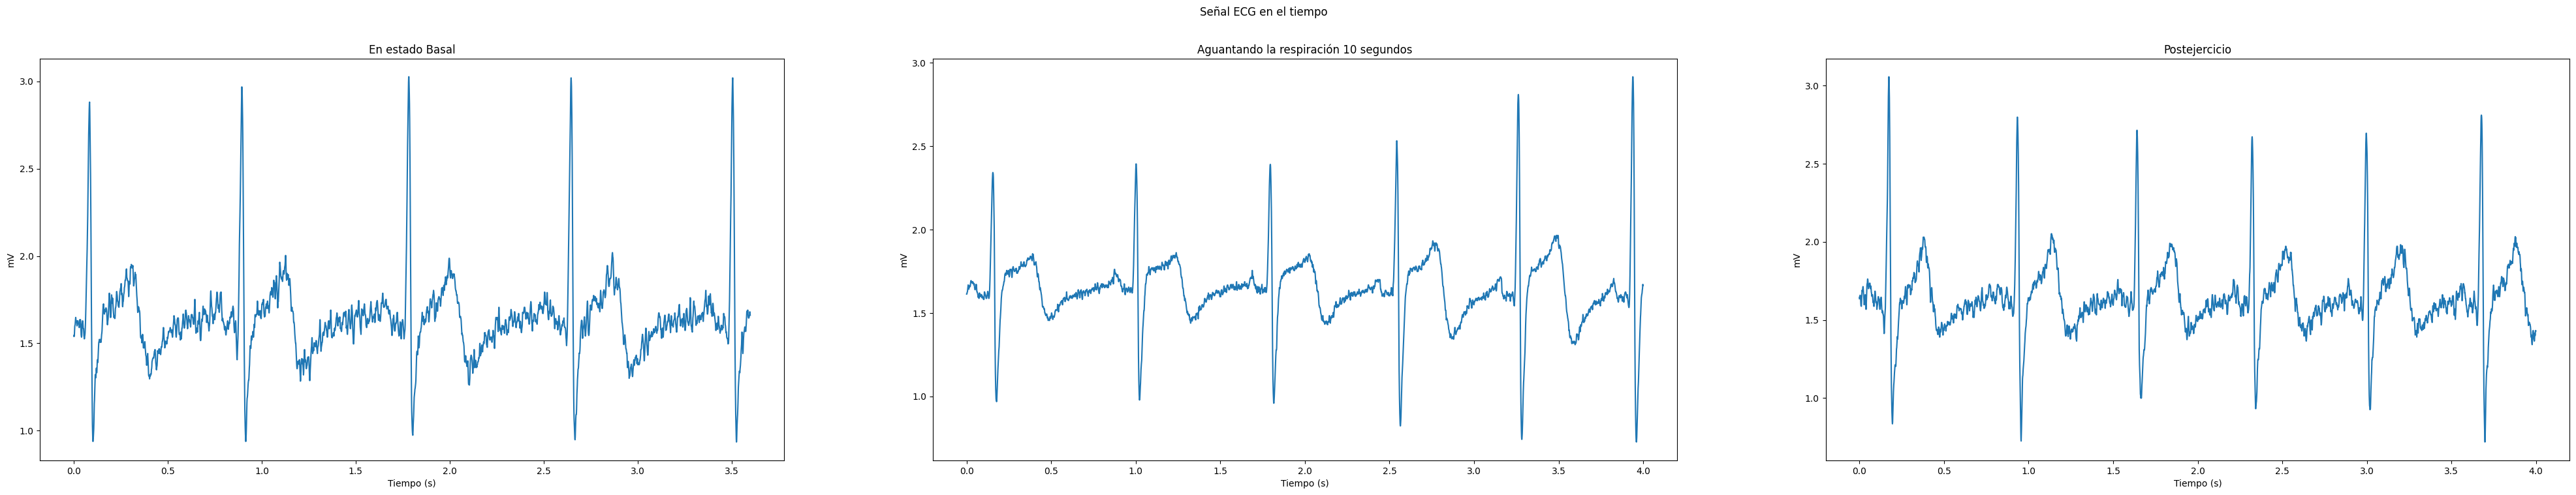

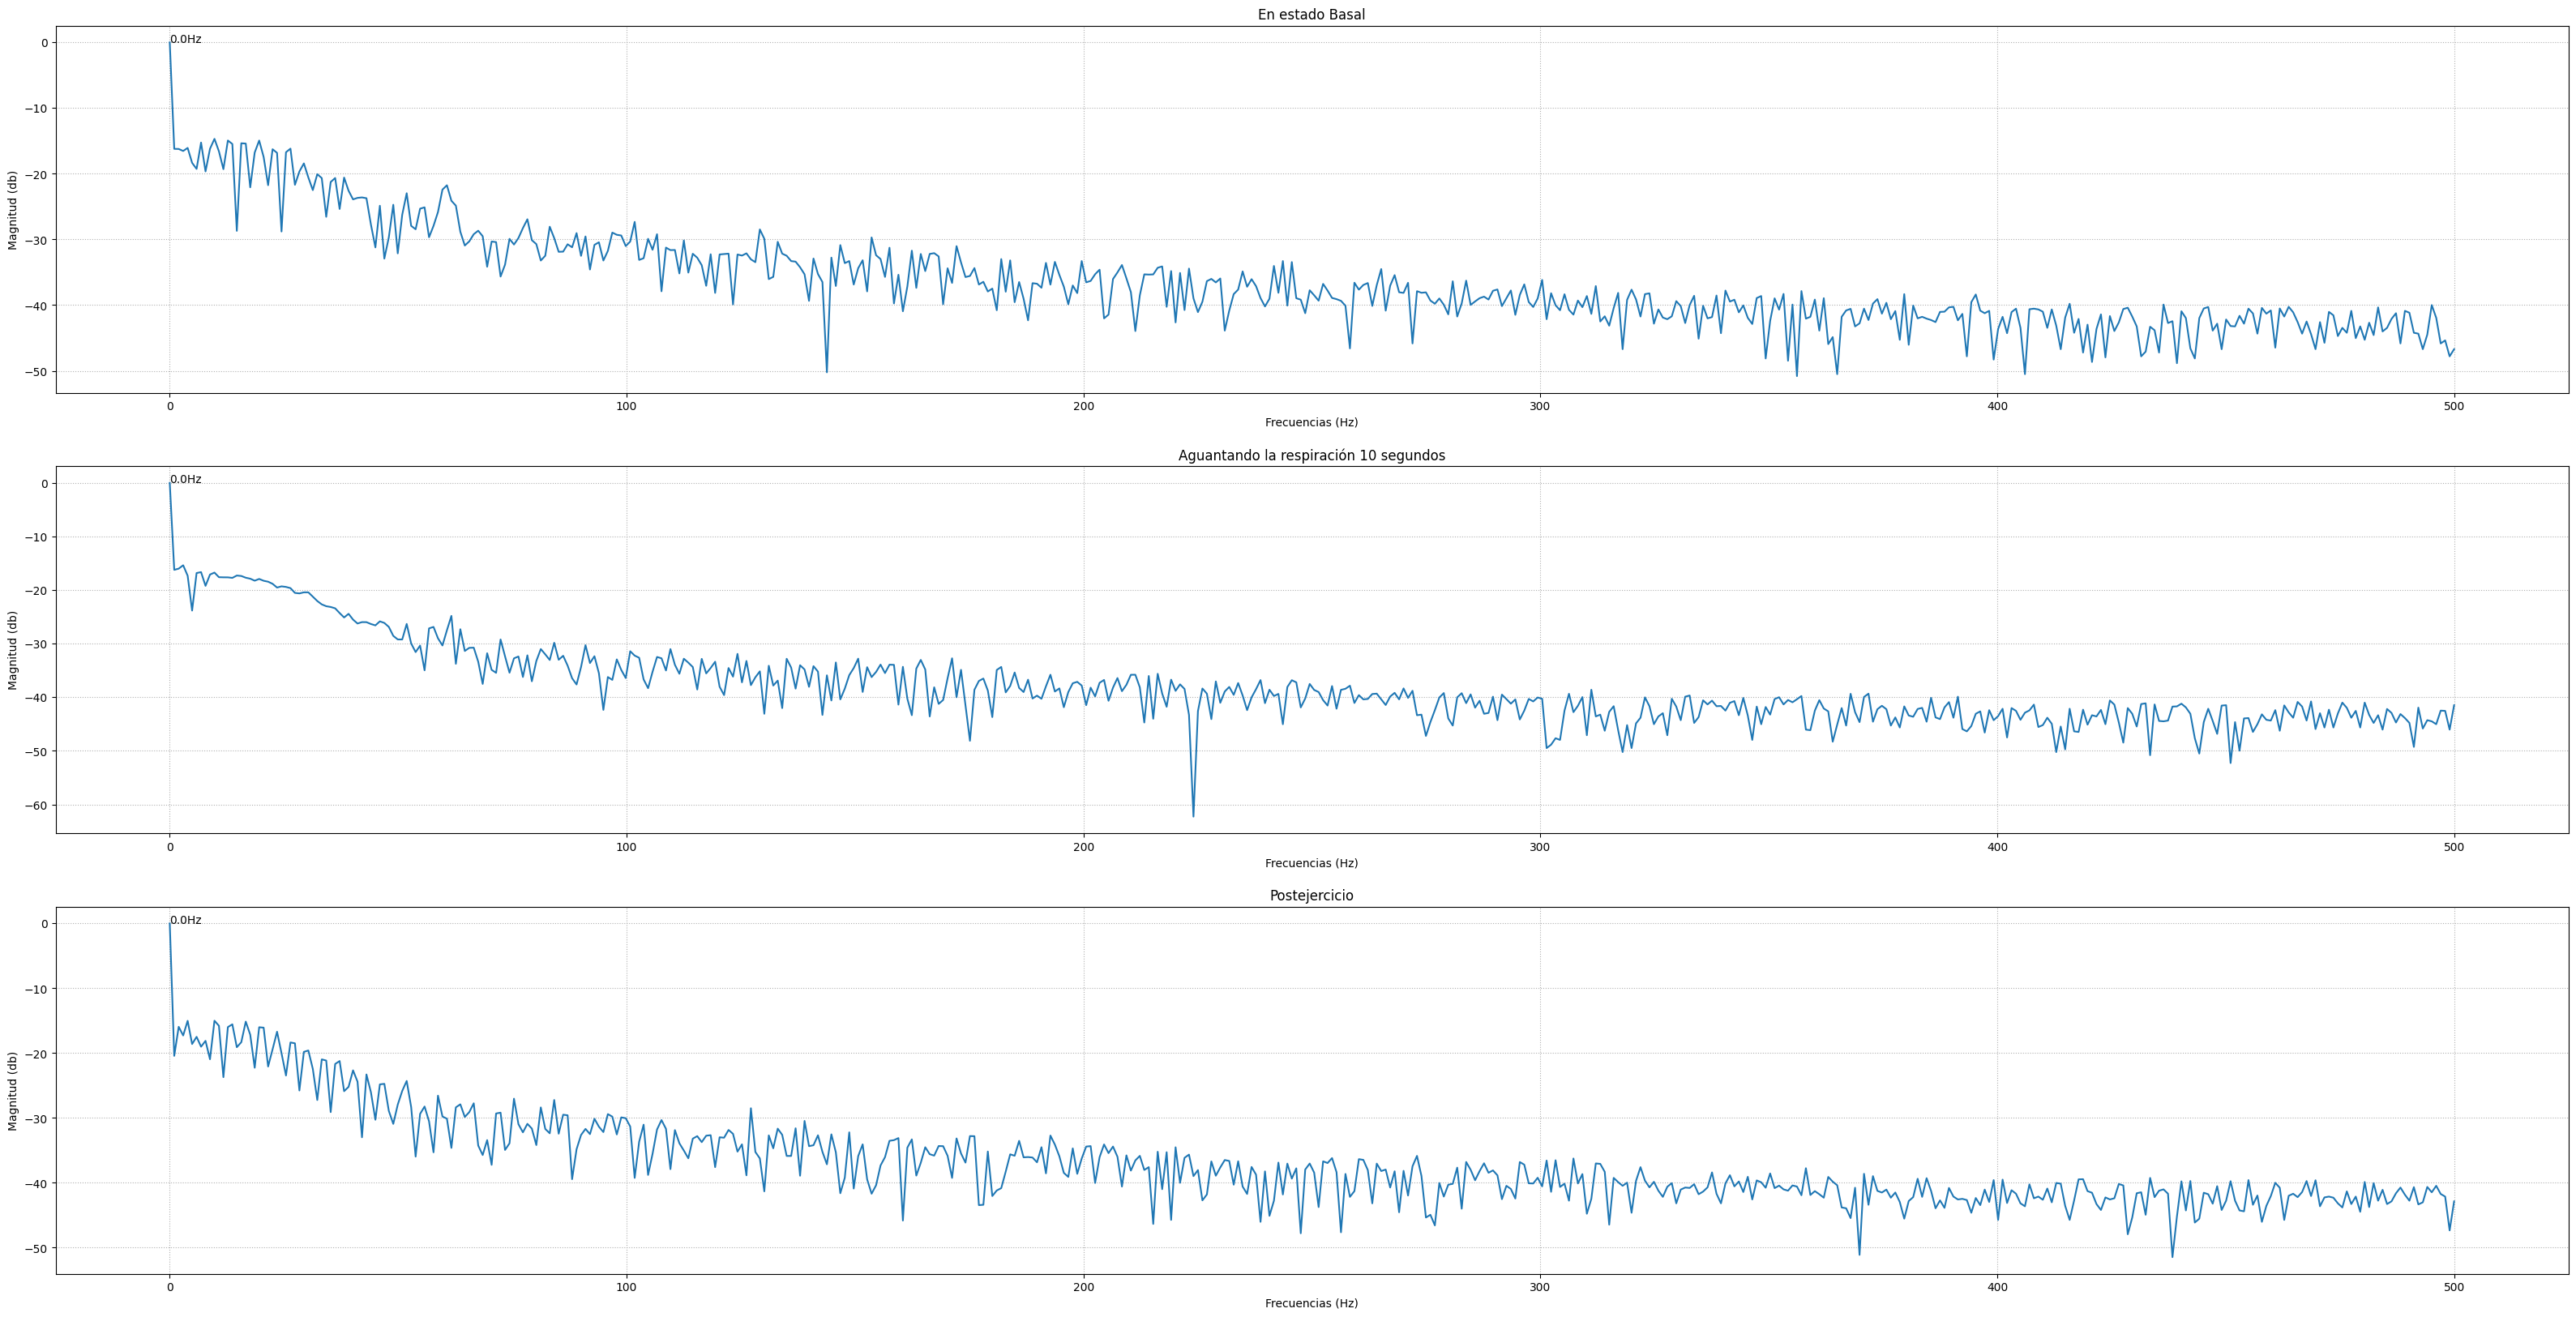

In [6]:
## Leemos el archivo excluyendo las 2 primeras filas del archivo"""
#Paciento Ricardo Muñoz
array = np.genfromtxt("./Senal4.txt", delimiter="\t",skip_header = 3) # La "Senal4" es la señal del paciente Muñoz en estado basal
array1 = np.genfromtxt("./Senal5.txt", delimiter="\t",skip_header = 3)# La "Senal5" es la señal del paciente Muñoz aguantando la respiracion 10 segundos
array2 = np.genfromtxt("./Senal6.txt", delimiter="\t",skip_header = 3)# La "Senal6" es la señal del paciente Muñoz post ejercicio
#array

data_mV_ECG_reposo = (array[:,-2])*(3.3/1023) 
data_mV_ECG_respiracion = (array1[:,-2])*(3.3/1023) 
data_mV_ECG_deporte = (array2[:,-2])*(3.3/1023) #resolucion*Vref/1023 segun el puerto A2 para ECG

## Ploteo de la lectura"""

plt.figure(figsize=(50,8))
plt.suptitle("Señal ECG en el tiempo");

t1=np.arange(0,len(data_mV_ECG_reposo[30000:34000]))/1000
plt.subplot(1,3,1);plt.plot(t1,data_mV_ECG_reposo[30000:34000]),plt.ylabel("mV"),plt.xlabel("Tiempo (s)"),plt.title("En estado Basal")
t2=np.arange(0,len(data_mV_ECG_respiracion[30000:34000]))/1000
plt.subplot(1,3,2);plt.plot(t2,data_mV_ECG_respiracion[30000:34000]),plt.ylabel("mV"),plt.xlabel("Tiempo (s)"),plt.title("Aguantando la respiración 10 segundos")
t3=np.arange(0,len(data_mV_ECG_deporte[30000:34000]))/1000
plt.subplot(1,3,3);plt.plot(t3,data_mV_ECG_deporte[30000:34000]),plt.ylabel("mV"),plt.xlabel("Tiempo (s)"),plt.title("Postejercicio")



## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia"""

N = 2**10                                     # 10 bits, 0-1023
Fs=1000
F_list = np.linspace(0,Fs/2, N//2)
signal1 = data_mV_ECG_reposo; signal2 = data_mV_ECG_respiracion; signal3 = data_mV_ECG_deporte

signal_fft1 = np.round(np.abs(np.fft.fft(signal1, N)),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux1 = signal_fft1/signal_fft1.max()     # hallamos el maximo para pasar la magnitud a escala db
with np.errstate(divide='ignore'):
    signal_fft_db1 = 10*np.log10(signal_aux1)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero
F1 = np.round(F_list[np.argmax(signal_fft_db1)], 1)   # argmax, encuentra el argumento max en un array

signal_fft2 = np.round(np.abs(np.fft.fft(signal2, N)),3)[0:N//2]
signal_aux2 = signal_fft2/signal_fft2.max()   
with np.errstate(divide='ignore'):
    signal_fft_db2 = 10*np.log10(signal_aux2) 
F2 = np.round(F_list[np.argmax(signal_fft_db2)], 1)  

signal_fft3 = np.round(np.abs(np.fft.fft(signal3, N)),3)[0:N//2] 
signal_aux3 = signal_fft3/signal_fft3.max()    
with np.errstate(divide='ignore'):
    signal_fft_db3 = 10*np.log10(signal_aux3)  
F3 = np.round(F_list[np.argmax(signal_fft_db3)], 1) 

plt.figure(figsize=(40,20))
plt.subplot(3,1,1);plt.plot(F_list, signal_fft_db1);plt.text(F1,0, f"{F1}Hz");plt.grid(linestyle=":");plt.ylabel("Magnitud (db)");plt.xlabel("Frecuencias (Hz)");plt.title("En estado Basal")
plt.subplot(3,1,2);plt.plot(F_list, signal_fft_db2);plt.text(F2,0, f"{F2}Hz");plt.grid(linestyle=":");plt.ylabel("Magnitud (db)");plt.xlabel("Frecuencias (Hz)");plt.title("Aguantando la respiración 10 segundos")
plt.subplot(3,1,3);plt.plot(F_list, signal_fft_db3);plt.text(F3,0, f"{F3}Hz");plt.grid(linestyle=":");plt.ylabel("Magnitud (db)");plt.xlabel("Frecuencias (Hz)");plt.title("Postejercicio")

plt.show()

# Prosim 4 - ECG Simulador

Se obtuvieron señales ECG del simulador de señales EGC (Prosim)\
-En **Adulto** 60 bpm *(rango normal)*\
-En **Adulto** 120 bpm *(taquicardia leve)*\
-En **Adulto** 240 bpm *(taquicardia grave)*\
-En paciente **Adulto** con Fibrilación Auricular

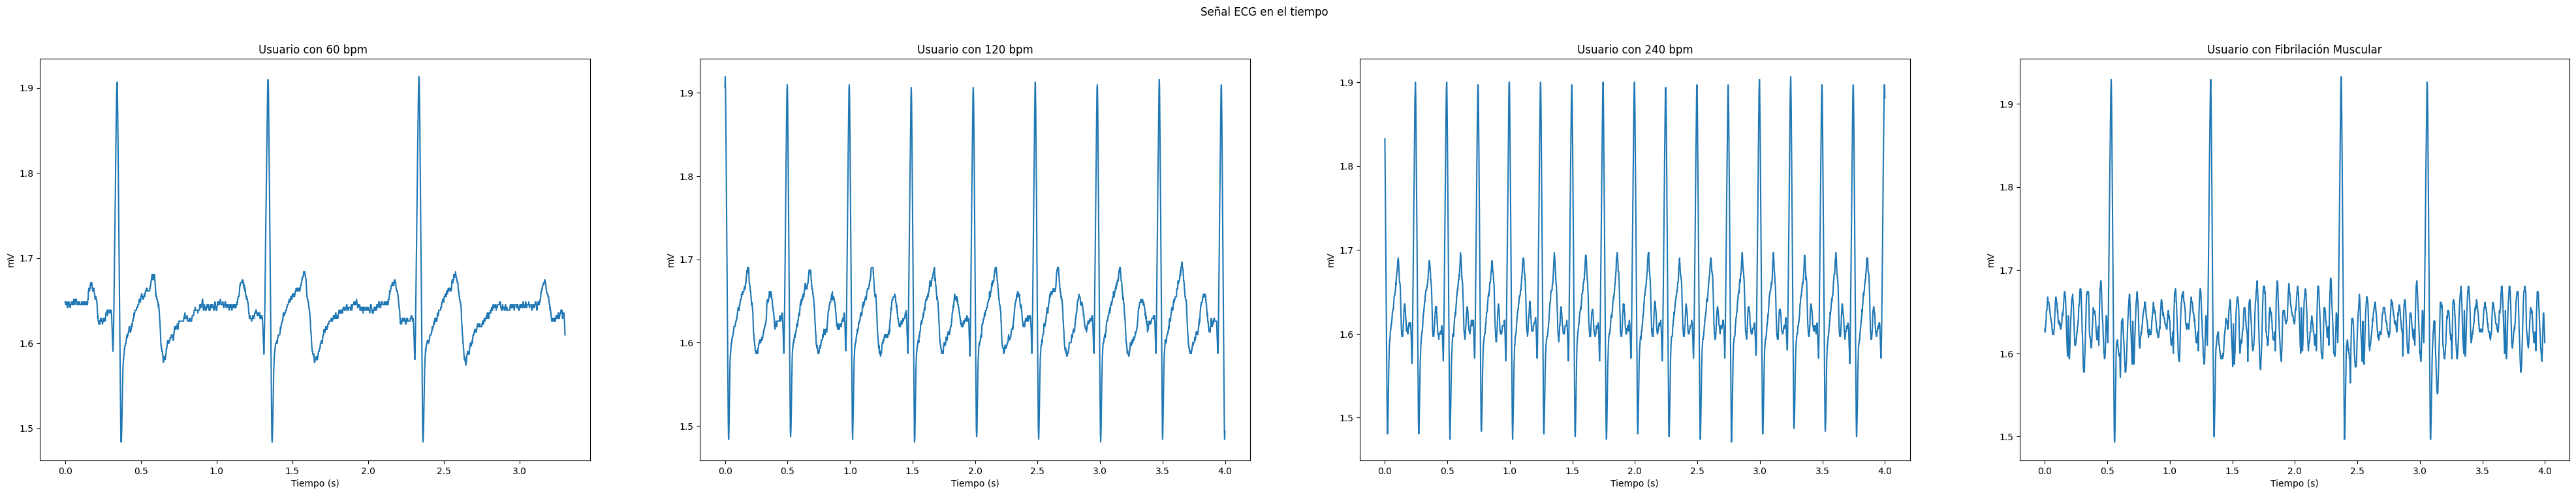

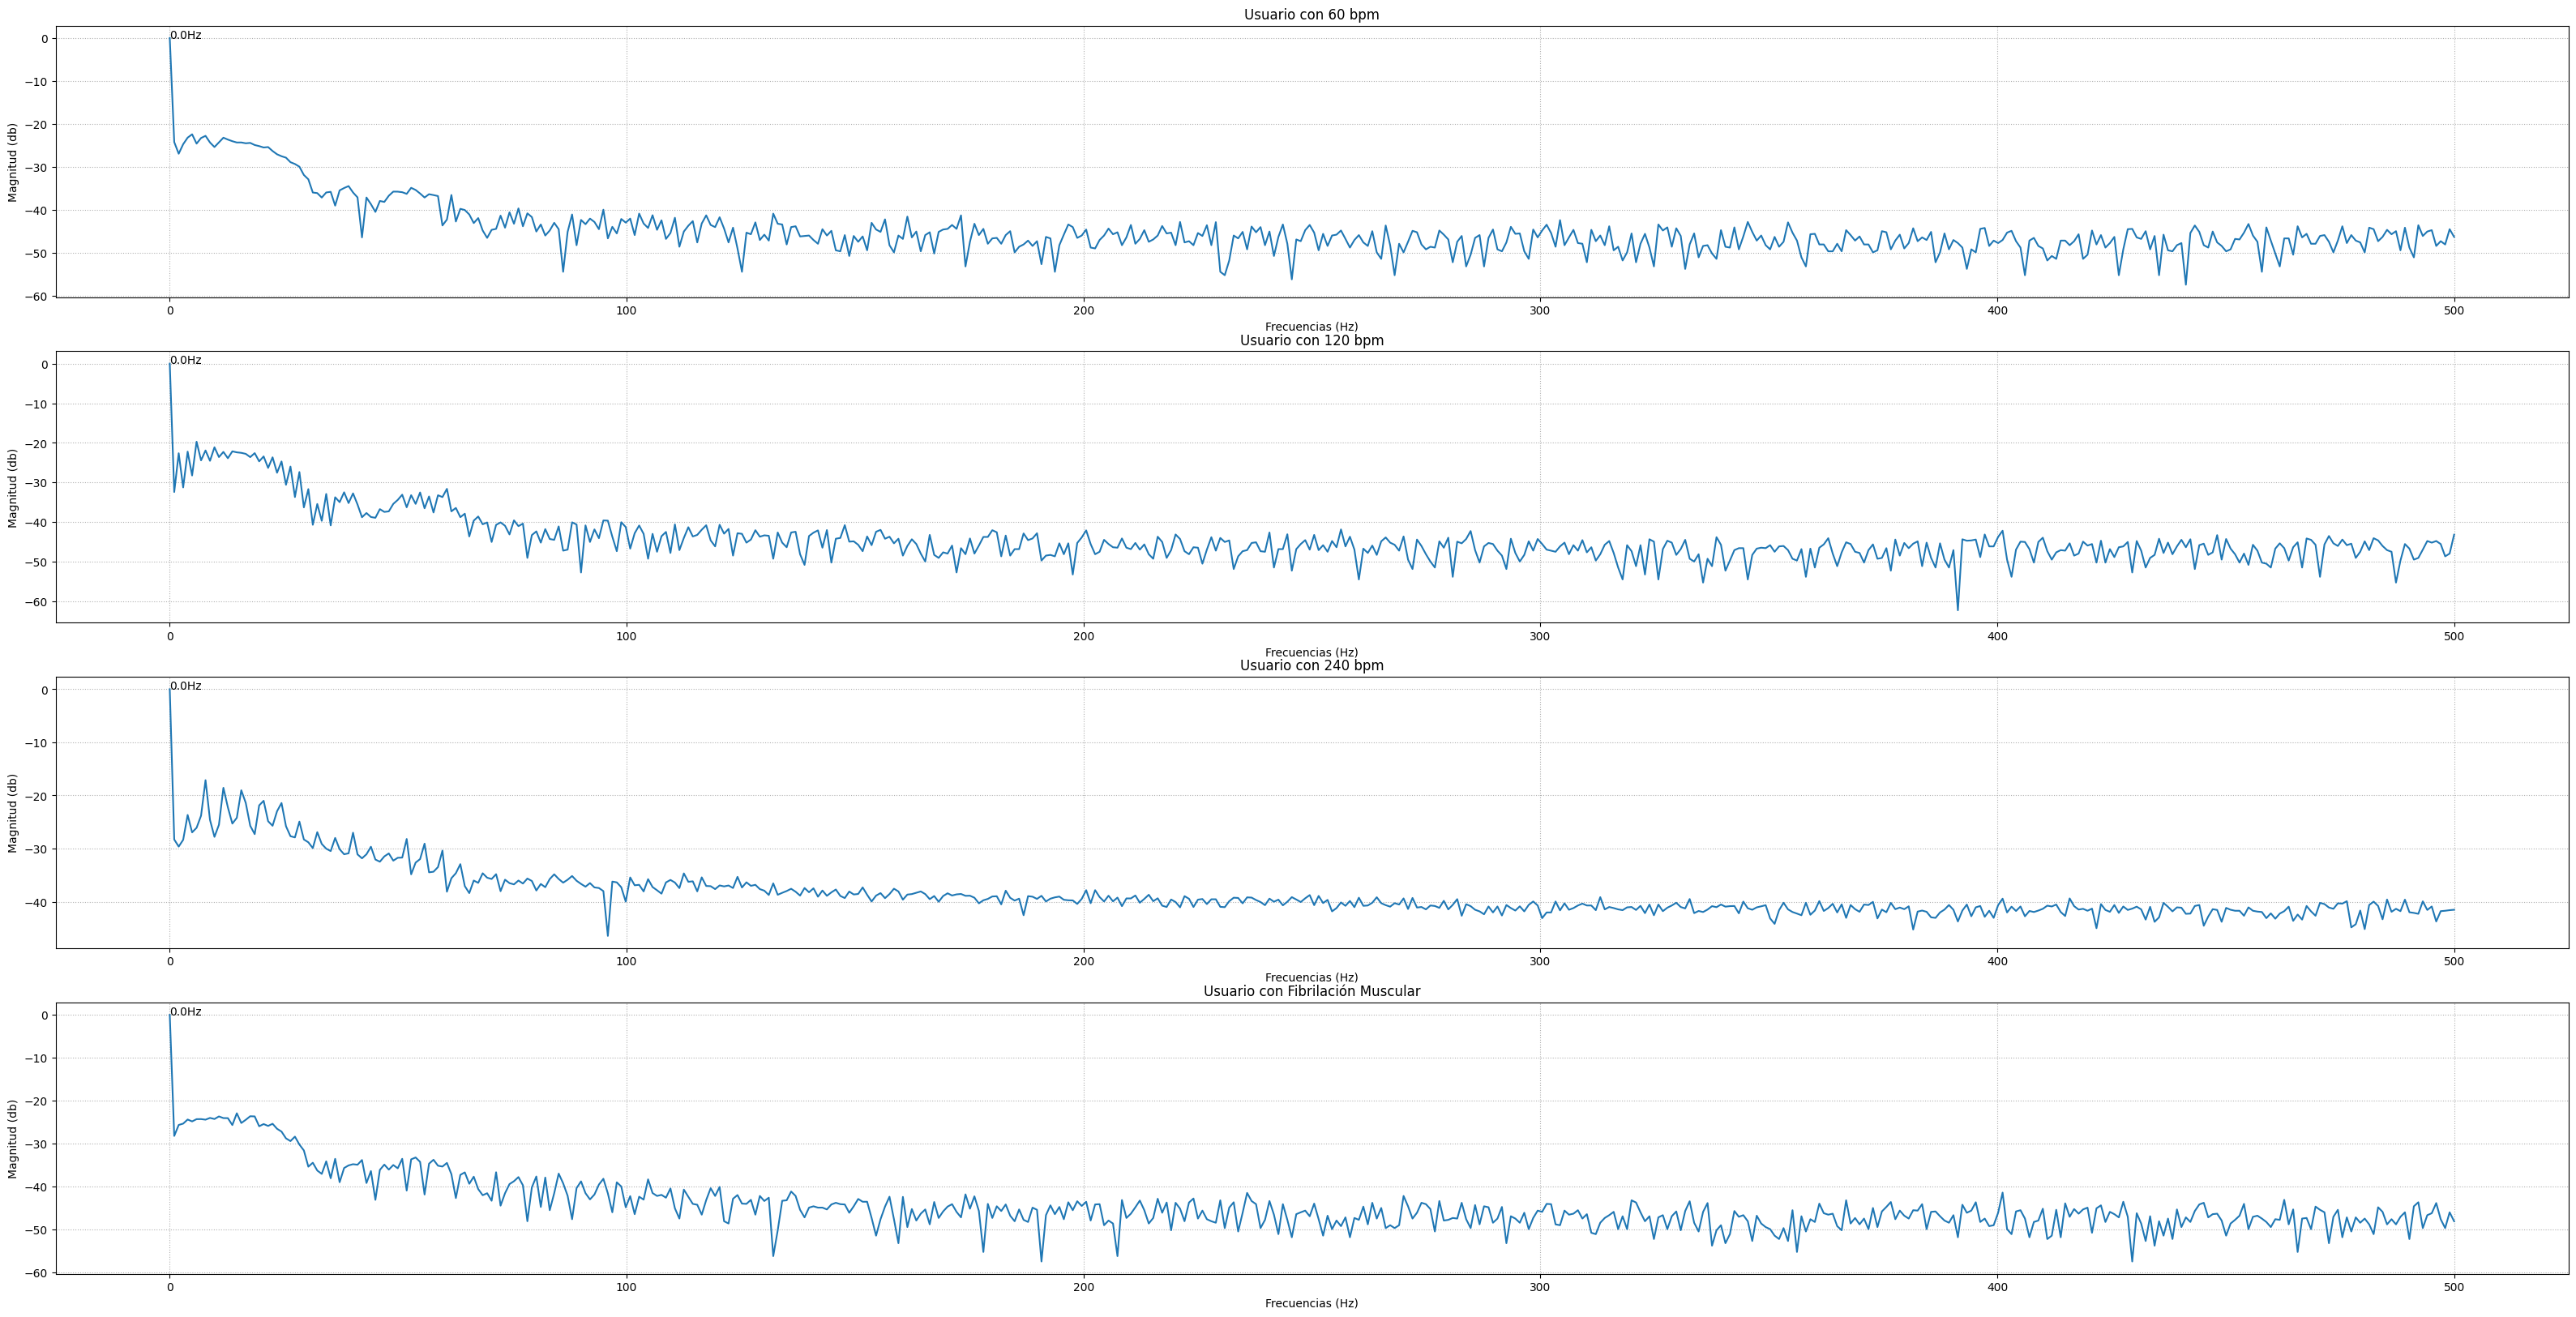

In [9]:
## Leemos el archivo excluyendo las 2 primeras filas del archivo"""
#Prosim4 - Ecg simulador
array = np.genfromtxt("./Senal7.txt", delimiter="\t",skip_header = 3) # La "Senal7" es la señal de un paciente con 60 latidos por minuto (60bpm)
array1 = np.genfromtxt("./Senal8.txt", delimiter="\t",skip_header = 3)# La "Senal8" es la señal de un paciente con 120 latidos por minuto (120bpm)
array2 = np.genfromtxt("./Senal9.txt", delimiter="\t",skip_header = 3)# La "Senal9" es la señal de un paciente con 240 latidos por minuto (240bpm)
array3 = np.genfromtxt("./Senal10.txt", delimiter="\t",skip_header = 3)# La "Senal10" es la señal de un paciente con una enfermedad - Fibrilación Auricular (severa)
#array

data_mV_ECG_60bpm = (array[:,-2])*(3.3/1023) #resolucion*Vref/1023 segun el puerto A2 para ECG
data_mV_ECG_120bpm = (array1[:,-2])*(3.3/1023) 
data_mV_ECG_240bpm = (array2[:,-2])*(3.3/1023) 
data_mV_ECG_fibri = (array3[:,-2])*(3.3/1023)
## Ploteo de la lectura"""

plt.figure(figsize=(50,8))
plt.suptitle("Señal ECG en el tiempo");

t1=np.arange(0,len(data_mV_ECG_60bpm[30000:34000]))/1000
plt.subplot(1,4,1);plt.plot(t1,data_mV_ECG_60bpm[30000:34000]),plt.ylabel("mV"),plt.xlabel("Tiempo (s)"),plt.title("Usuario con 60 bpm ")
t2=np.arange(0,len(data_mV_ECG_120bpm[30000:34000]))/1000
plt.subplot(1,4,2);plt.plot(t2,data_mV_ECG_120bpm[30000:34000]),plt.ylabel("mV"),plt.xlabel("Tiempo (s)"),plt.title("Usuario con 120 bpm")
t3=np.arange(0,len(data_mV_ECG_240bpm[30000:34000]))/1000
plt.subplot(1,4,3);plt.plot(t3,data_mV_ECG_240bpm[30000:34000]),plt.ylabel("mV"),plt.xlabel("Tiempo (s)"),plt.title("Usuario con 240 bpm")
t4=np.arange(0,len(data_mV_ECG_fibri[30000:34000]))/1000
plt.subplot(1,4,4);plt.plot(t3,data_mV_ECG_fibri[30000:34000]),plt.ylabel("mV"),plt.xlabel("Tiempo (s)"),plt.title("Usuario con Fibrilación Muscular")


## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia"""

N = 2**10                                     # 10 bits, 0-1023
Fs=1000
F_list = np.linspace(0,Fs/2, N//2)
signal1 = data_mV_ECG_60bpm; signal2 = data_mV_ECG_120bpm; signal3 = data_mV_ECG_240bpm; signal4 = data_mV_ECG_fibri

signal_fft1 = np.round(np.abs(np.fft.fft(signal1, N)),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux1 = signal_fft1/signal_fft1.max()     # hallamos el maximo para pasar la magnitud a escala db
with np.errstate(divide='ignore'):
    signal_fft_db1 = 10*np.log10(signal_aux1)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero
F1 = np.round(F_list[np.argmax(signal_fft_db1)], 1)   # argmax, encuentra el argumento max en un array

signal_fft2 = np.round(np.abs(np.fft.fft(signal2, N)),3)[0:N//2]
signal_aux2 = signal_fft2/signal_fft2.max()   
with np.errstate(divide='ignore'):
    signal_fft_db2 = 10*np.log10(signal_aux2) 
F2 = np.round(F_list[np.argmax(signal_fft_db2)], 1)  

signal_fft3 = np.round(np.abs(np.fft.fft(signal3, N)),3)[0:N//2] 
signal_aux3 = signal_fft3/signal_fft3.max()    
with np.errstate(divide='ignore'):
    signal_fft_db3 = 10*np.log10(signal_aux3)  
F3 = np.round(F_list[np.argmax(signal_fft_db3)], 1) 

signal_fft4 = np.round(np.abs(np.fft.fft(signal4, N)),3)[0:N//2] 
signal_aux4 = signal_fft4/signal_fft4.max()    
with np.errstate(divide='ignore'):
    signal_fft_db4 = 10*np.log10(signal_aux4)  
F4 = np.round(F_list[np.argmax(signal_fft_db4)], 1)

plt.figure(figsize=(40,20))
plt.subplot(4,1,1);plt.plot(F_list, signal_fft_db1);plt.text(F1,0, f"{F1}Hz");plt.grid(linestyle=":");plt.ylabel("Magnitud (db)");plt.xlabel("Frecuencias (Hz)");plt.title("Usuario con 60 bpm")
plt.subplot(4,1,2);plt.plot(F_list, signal_fft_db2);plt.text(F2,0, f"{F2}Hz");plt.grid(linestyle=":");plt.ylabel("Magnitud (db)");plt.xlabel("Frecuencias (Hz)");plt.title("Usuario con 120 bpm")
plt.subplot(4,1,3);plt.plot(F_list, signal_fft_db3);plt.text(F3,0, f"{F3}Hz");plt.grid(linestyle=":");plt.ylabel("Magnitud (db)");plt.xlabel("Frecuencias (Hz)");plt.title("Usuario con 240 bpm")
plt.subplot(4,1,4);plt.plot(F_list, signal_fft_db4);plt.text(F4,0, f"{F3}Hz");plt.grid(linestyle=":");plt.ylabel("Magnitud (db)");plt.xlabel("Frecuencias (Hz)");plt.title("Usuario con Fibrilación Muscular")
plt.show()